<a href="https://colab.research.google.com/github/kwbentleyjr/data_analytics_2/blob/main/Python/Unit_4_ML_KNN_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.
## Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X ,capital X (designating matrix)

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [1]:
#import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
load_boston()	Load and return the boston house-prices dataset (regression).
load_iris()	Load and return the iris dataset (classification).
load_diabetes()	Load and return the diabetes dataset (regression).

Example of 21 Pandas operations on data files 

https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda

In [3]:
#read the dataset and assign it to the variable df
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [4]:
df.head()#display the first five rows

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.columns #display the column names

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  #drop the 'unamed: 0' column


In [7]:
df.head() #display the first five rows again

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
type(df) #print the type of object df

pandas.core.frame.DataFrame

In [9]:
ad_data = df #assign object df to the variable ad_data

In [10]:
print (ad_data) #print ad_data

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


In [11]:
# import the StandardScaler function from the sklearn.preprocessing module 
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

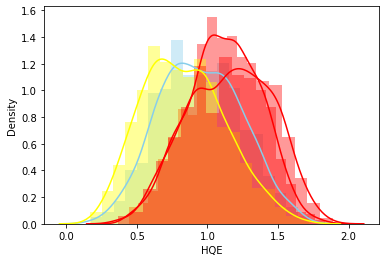

In [12]:
#plot columns WTT, PTI, EQW, and HQE
sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")



#Standardization and Normalization of data

https://benalexkeen.com/feature-scaling-with-scikit-learn/

 Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization or standardization. 

There are 4 types of scaling in sicikit

 StandardScaler, MinMaxScaler, RobustScaler, Normalizer
Two most common used is Normalization (help to scale your features 0 to 1 ) and (standarization , Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1) 

we are standardizing the data now   


 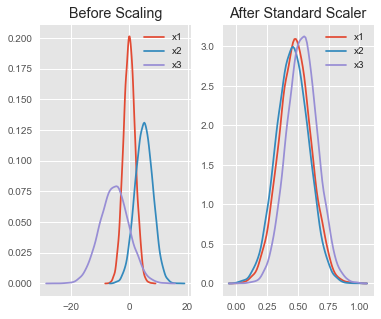


In [13]:
# define scaler as the function StandardScaler
scalar = StandardScaler()

In [14]:
#fit() calculates the parameters (𝜇,std,var) when StandardScaler used

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
# transform data and assign to variable name scaled_features
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))


In [16]:
# create a dataframe called df_feature with scaled_features values
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [17]:
X = df.drop('TARGET CLASS',axis=1).values


In [18]:
# display the first five rows of df_feature
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

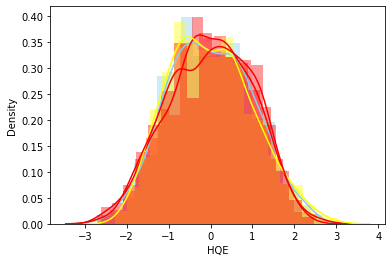

In [19]:
# after scaling let's compare the columns 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## scikit-learn 4-step modeling pattern


Step 1 train and test your model
Import the library


With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test
Now

1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression



In [20]:
# import train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [21]:
#randomly splits the dataset into two parts; 70% for training, 30% for testing
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [22]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

print ("y_test: ", y_test)

X_train:  [[-0.72204623  0.03893993  1.06606019 ...  0.26012248 -0.89800698
  -0.27405973]
 [ 0.2305271   0.23072468 -0.72443961 ... -1.15371233  1.27623234
   0.98675026]
 [ 0.46583122 -1.24955012 -0.64005683 ... -0.63719148  1.81099759
  -1.75832559]
 ...
 [-1.19287538  1.04775553  0.38327186 ...  0.24673421 -0.78794791
  -0.36001154]
 [-1.19748401 -1.05452546 -1.71624064 ... -0.30397557  0.79544989
  -1.49711745]
 [-0.24105736 -0.4010479  -0.85698787 ... -2.41689614 -0.1846056
   1.21846274]]
y_train:  522    0
819    1
682    1
218    0
366    1
      ..
747    1
158    0
902    0
275    1
142    1
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  548    0
615    1
156    0
88     1
389    0
      ..
229    0
835    0
15     1
769    1
841    1
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [23]:
#import KNeighborsClassifier function from sklearn.neighbors module
from sklearn.neighbors import  KNeighborsClassifier

In [24]:
#create instance of KNeighborsClassifier function with nearest neighbor 
#assined to 1 and assign to knn variable
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
#takes X_train and y_train, then fits the model to define the classification model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [26]:
#creates the actual preditions and binds its references in the variable predict
predict = knn.predict(X_test)

In [27]:
#shows actual preditions array
predict 

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [28]:
#import confusion_matrix and classification_report from sklearn.metrics module
from sklearn.metrics import  classification_report, confusion_matrix

In [29]:
#print confusion matrix
print(confusion_matrix(y_test,predict))

[[122  15]
 [ 11 152]]


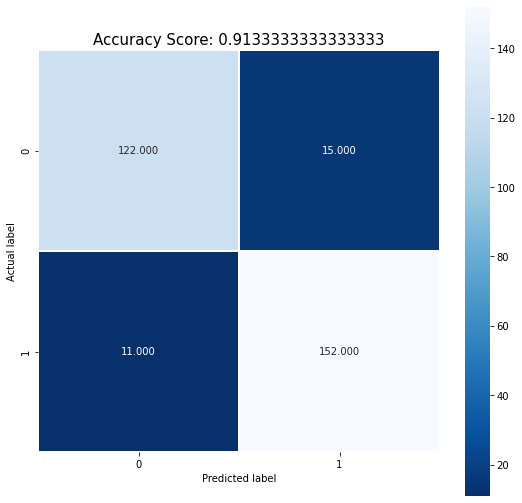

In [30]:
#create heatmap of confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [31]:
#Precision is ratio of correct predictions.  Total the number of times you predicted positive correctly
#and divide by the number of positive predictions total.
#recall is the ratio of how many times you predicted positive to the number of actual positive.
#Recall tells you how many times your model correctly identified the positive value.
#f1-score is a ratio of precision and recall. It is the weight score taking into account precision and 
#recall
print(classification_report(y_test,predict)) #display classification report

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       137
           1       0.91      0.93      0.92       163

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [32]:
from sklearn import metrics #import metrics module from sklearn package
first_trial = [] #create an empty list and assign to variable first_trial
first_trial.append(metrics.accuracy_score(y_test,predict)) #fill empty list with accuracy score
print(first_trial) #display accuarcy score

[0.9133333333333333]


# Repeat above steps for K = 5, see what happens with Accuracy

In [33]:
# The value of K passed to the Kneighborclassifier function
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
predict = knn.predict(X_test)

In [36]:
#shows actual preditions array
predict 

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [37]:
#print confusion matrix
print(confusion_matrix(y_test,predict))

[[125  12]
 [ 10 153]]


In [38]:
print(classification_report(y_test,predict)) #display classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       137
           1       0.93      0.94      0.93       163

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



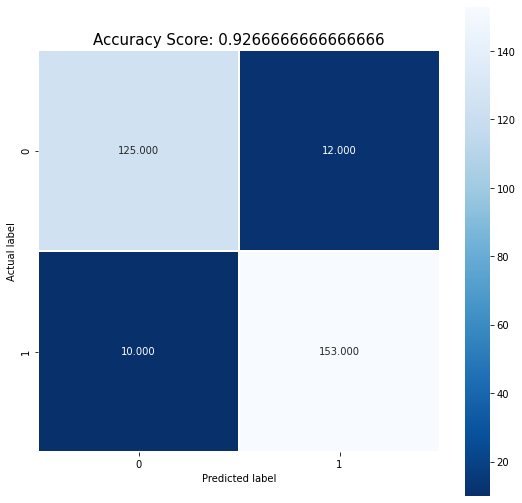

In [39]:
plt.figure(figsize=(9,9)) #create heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [40]:
from sklearn import metrics #import metrics module from sklearn package
first_trial = [] #create an empty list and assign to variable first_trial
first_trial.append(metrics.accuracy_score(y_test,predict)) #fill empty list with accuracy score
print(first_trial) #display accuarcy score

[0.9266666666666666]


# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [41]:
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [42]:
#import the metrics module from the sklearn package
from sklearn import metrics

In [43]:
score =[]#create an empty list and assign to variable score

In [44]:
#for loop, i values 1-39 taken from range function
# i is used for nearest neighbor values
#loop tests the accuracy of n neighbor values values from 1-39
#stores the accuracy scores in a counter called score and returns a list of the values
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9133333333333333, 0.8866666666666667, 0.92, 0.9233333333333333, 0.9266666666666666, 0.93, 0.9266666666666666, 0.93, 0.93, 0.93, 0.9366666666666666, 0.9266666666666666, 0.93, 0.9266666666666666, 0.9366666666666666, 0.9333333333333333, 0.94, 0.93, 0.94, 0.9333333333333333, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.93, 0.93, 0.93, 0.93, 0.93, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.94, 0.94, 0.9433333333333334, 0.9366666666666666, 0.9366666666666666, 0.94, 0.9366666666666666]


Text(0, 0.5, 'Testing Accuracy')

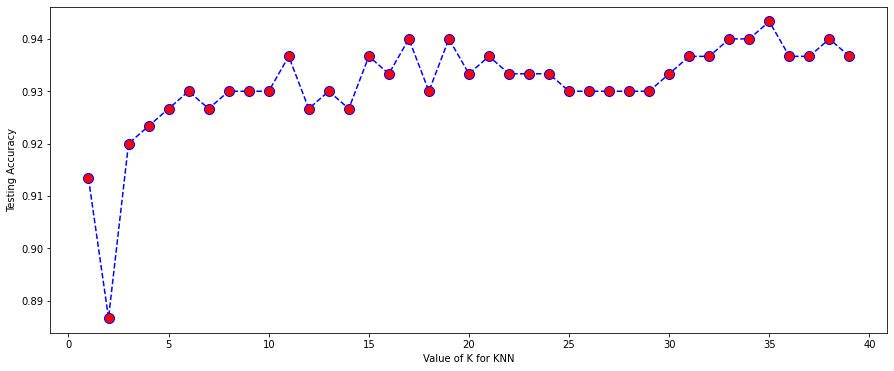

In [45]:
#plots a graph of the accuracy of nearest neighbor values
plt.figure(figsize=(15,6))
plt.plot(range(1,40),score, color='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


#Error Rate and K value

In [46]:
error_rate = [] #assigns an empty list to variable error_rate
# Might take some time
# a for loop that uses n neighbor values 1-39 to create a list of error_rates related to n neighbor values
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

print(error_rate)

[0.08666666666666667, 0.11333333333333333, 0.08, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07333333333333333, 0.07, 0.07, 0.07, 0.06333333333333334, 0.07333333333333333, 0.07, 0.07333333333333333, 0.06333333333333334, 0.06666666666666667, 0.06, 0.07, 0.06, 0.06666666666666667, 0.06333333333333334, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06666666666666667, 0.06333333333333334, 0.06333333333333334, 0.06, 0.06, 0.056666666666666664, 0.06333333333333334, 0.06333333333333334, 0.06, 0.06333333333333334]


Minimum error:- 0.056666666666666664 at K = 35
Maximum error:- 0.11333333333333333 at K = 2


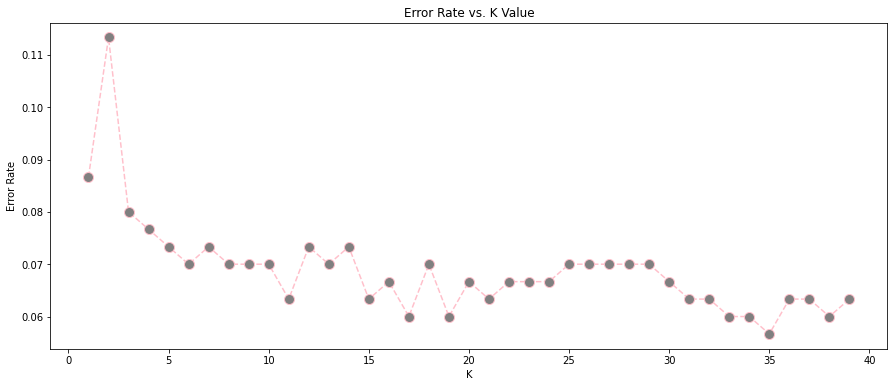

In [47]:
#creates a plot of error rates with nneighbor values 1-39
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#print min error rate at K value
print("Minimum error:-",min(error_rate),"at K =", (1+error_rate.index(min(error_rate))))
#print max error rate at K value
print("Maximum error:-",max(error_rate),"at K =", (1+error_rate.index(max(error_rate))))

# Conclusions

Scaling of the data helps the algorithms create models with more accuracy.  

The values in the classified data were far apart from each other.
  
Scaling brings the values closer together so that the algorithms can work more effectively.

A K value of 5 was more accurate than a K value of 1.

The higher the K value did not necessarily mean more accuracy. 

Minimum error was at K=35 while the error at K=2 was higher.
